In [41]:
from string import punctuation
from math import ceil
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import numpy as np
import glob

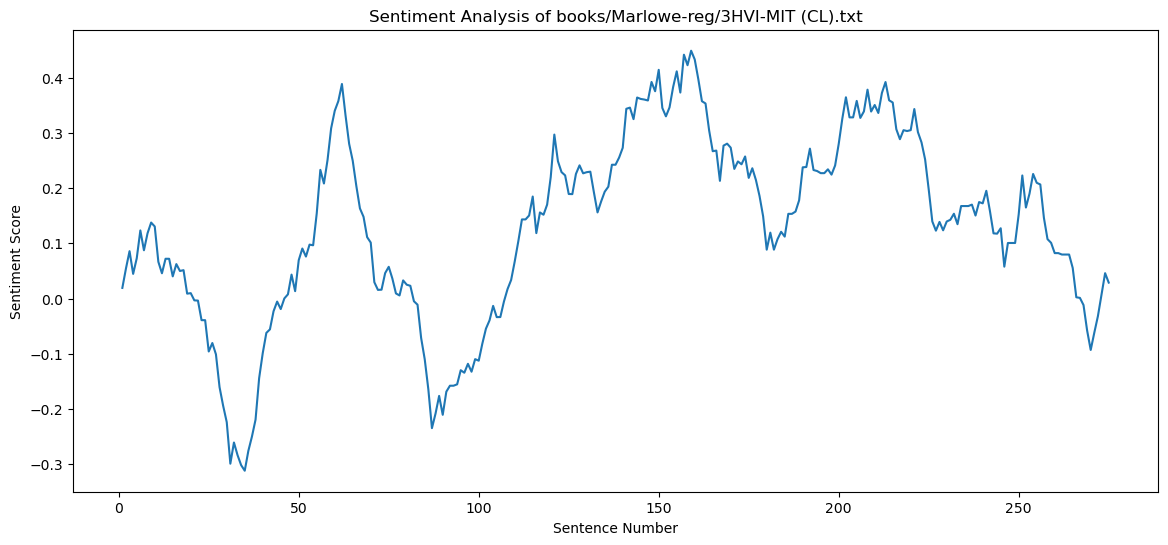

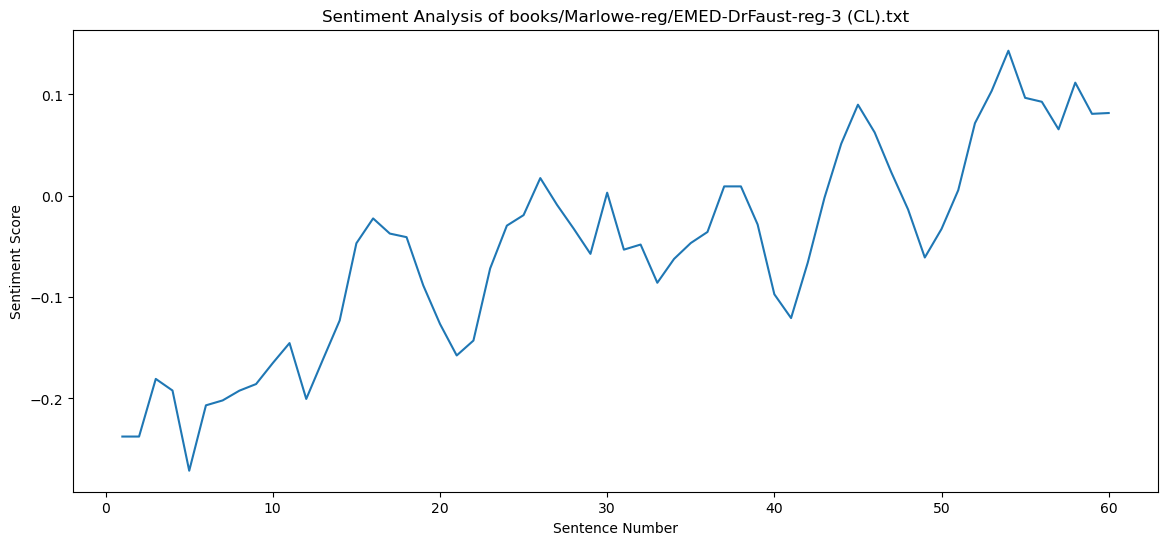

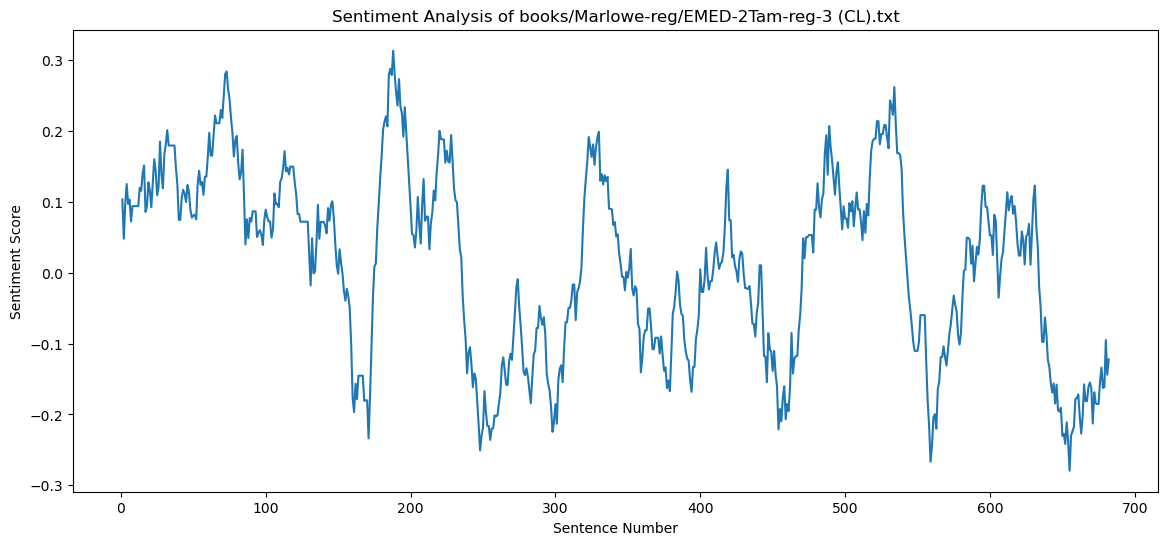

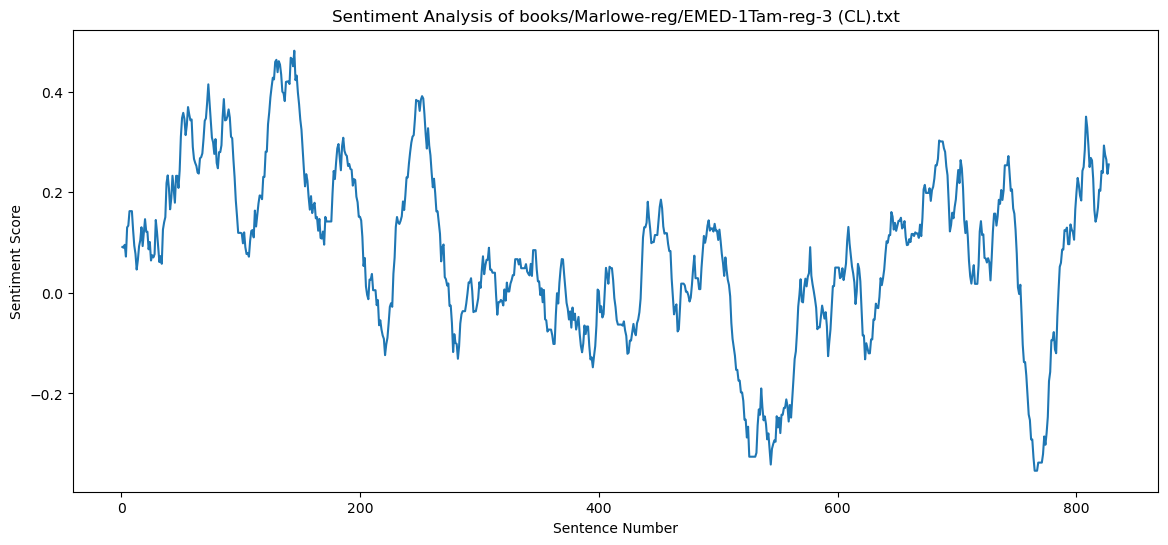

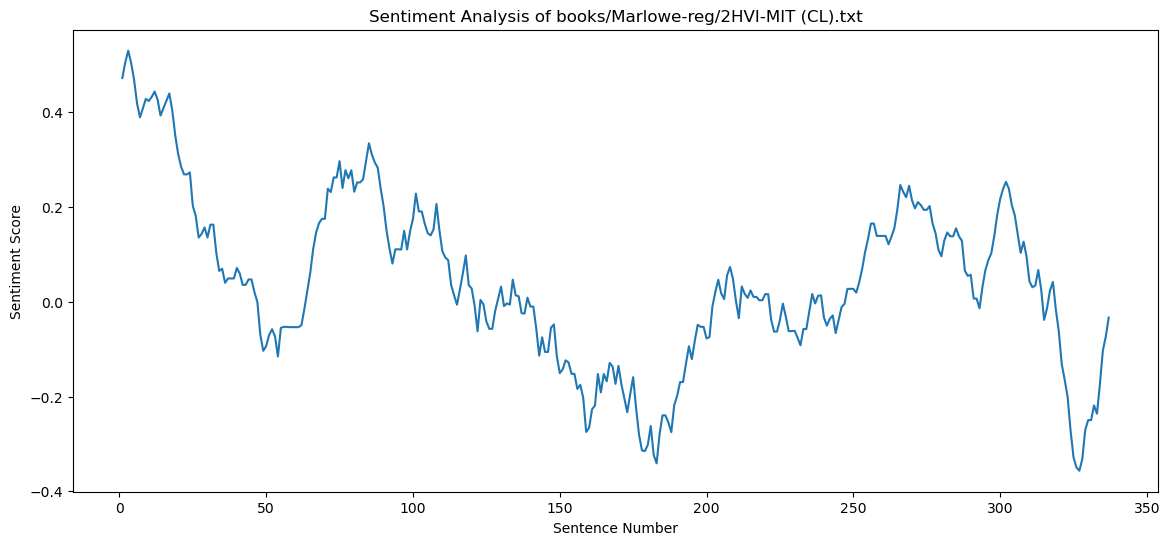

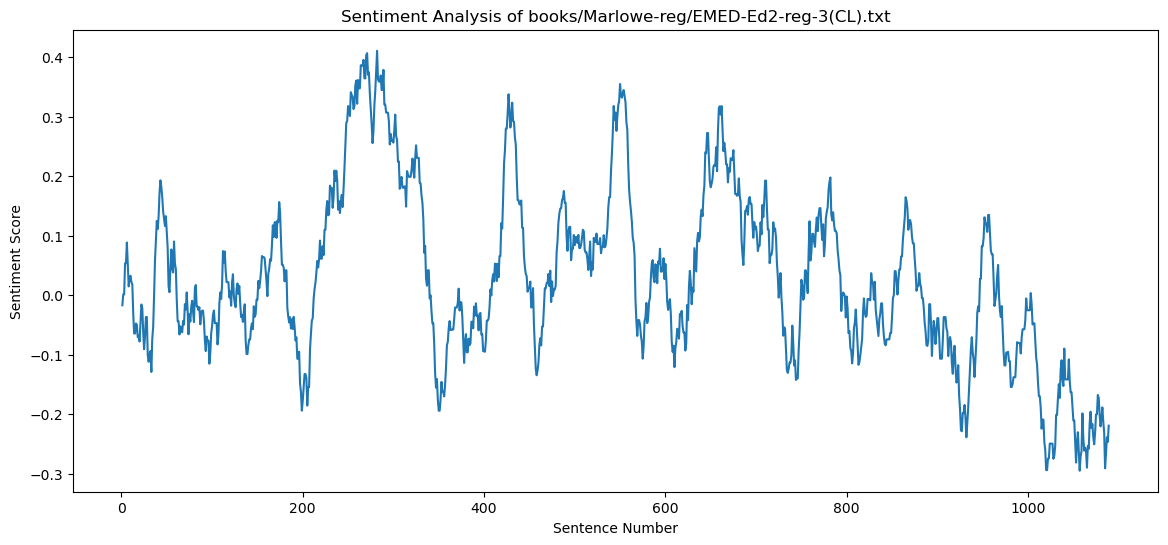

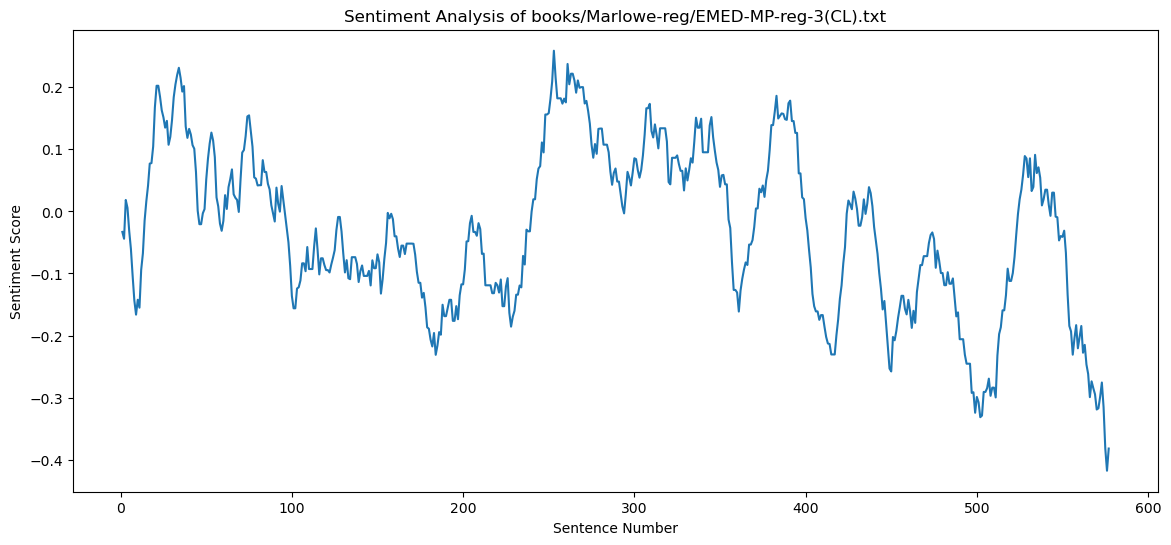

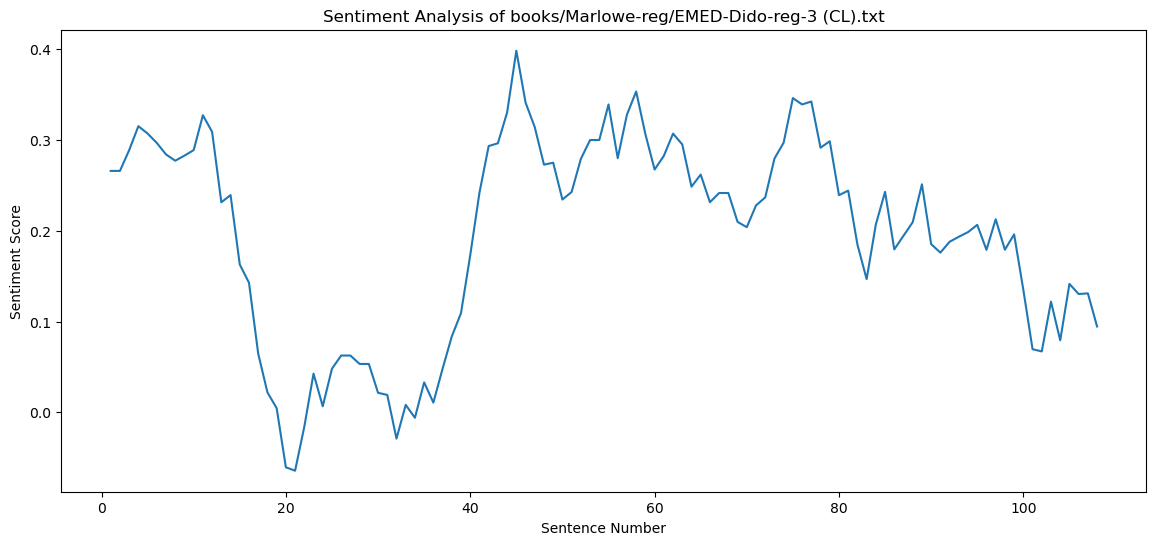

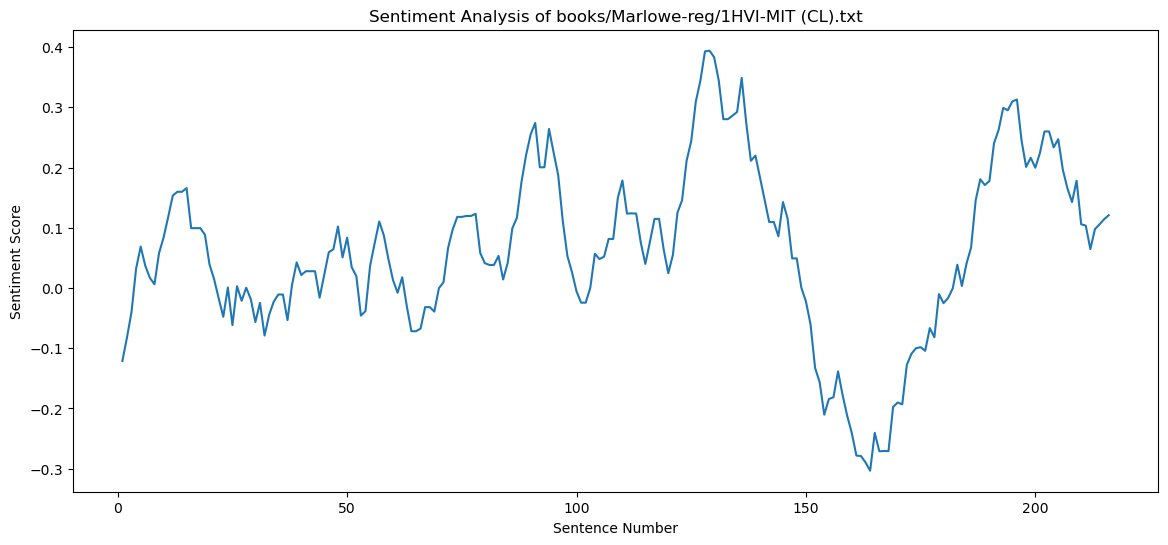

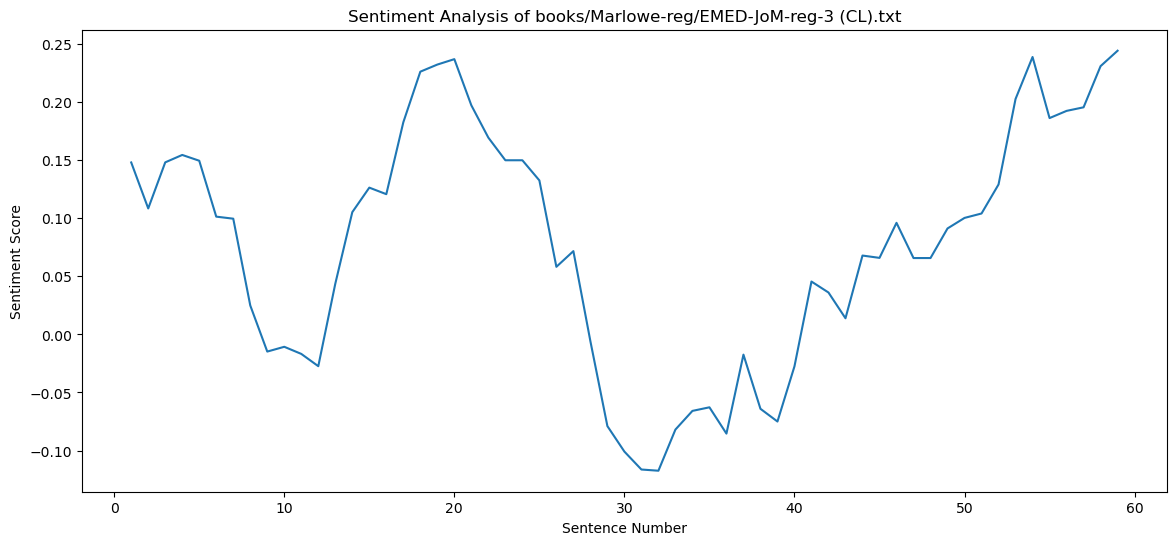

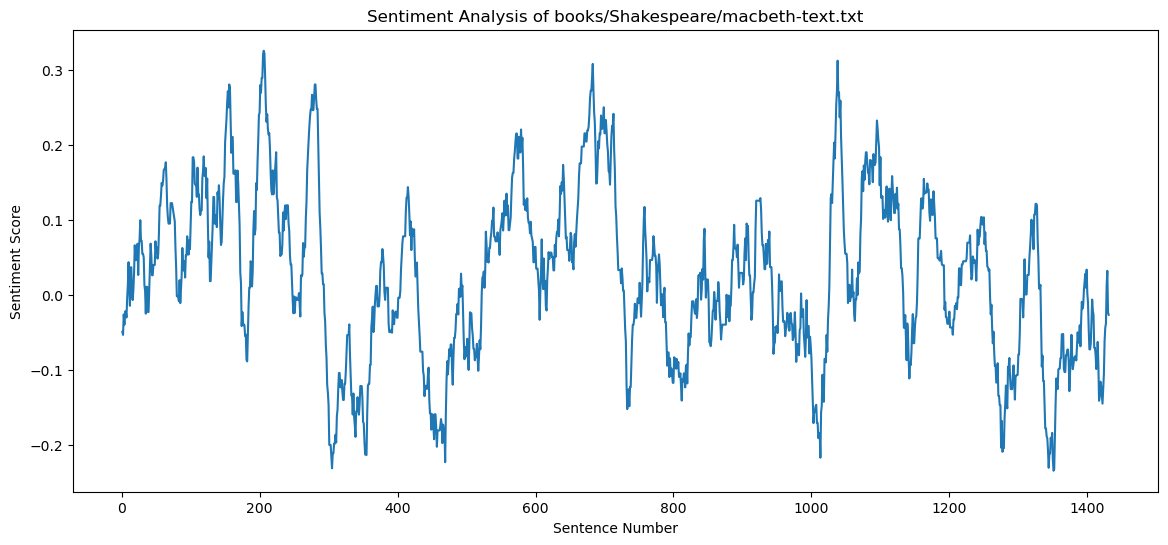

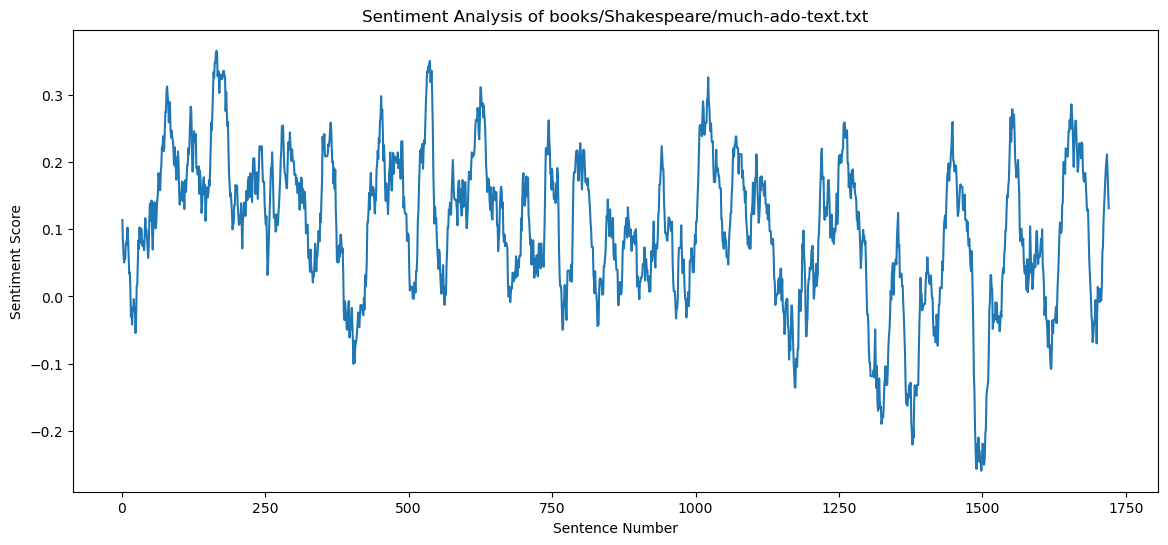

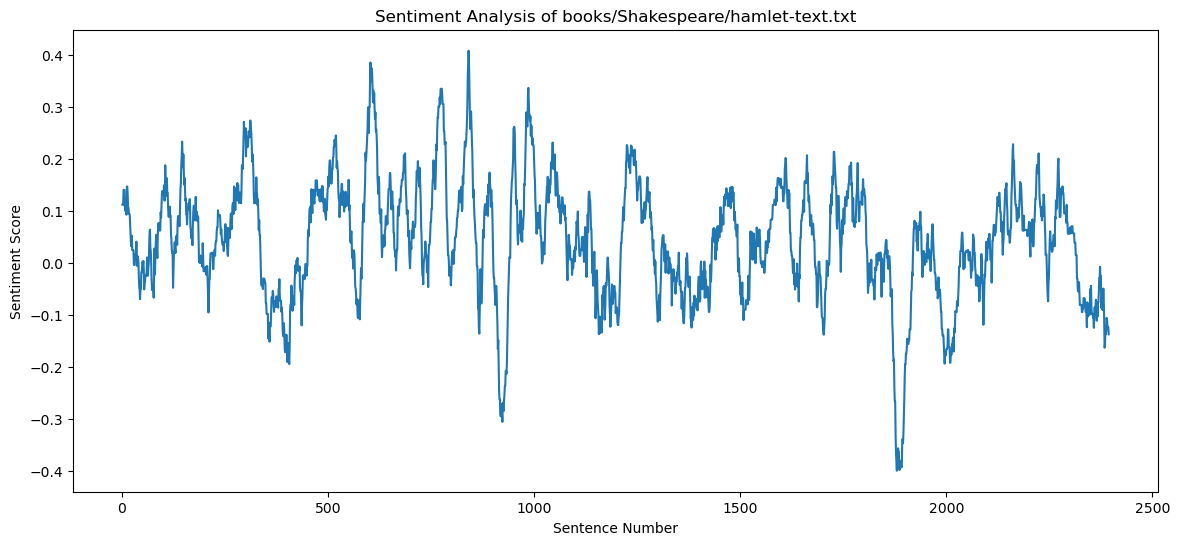

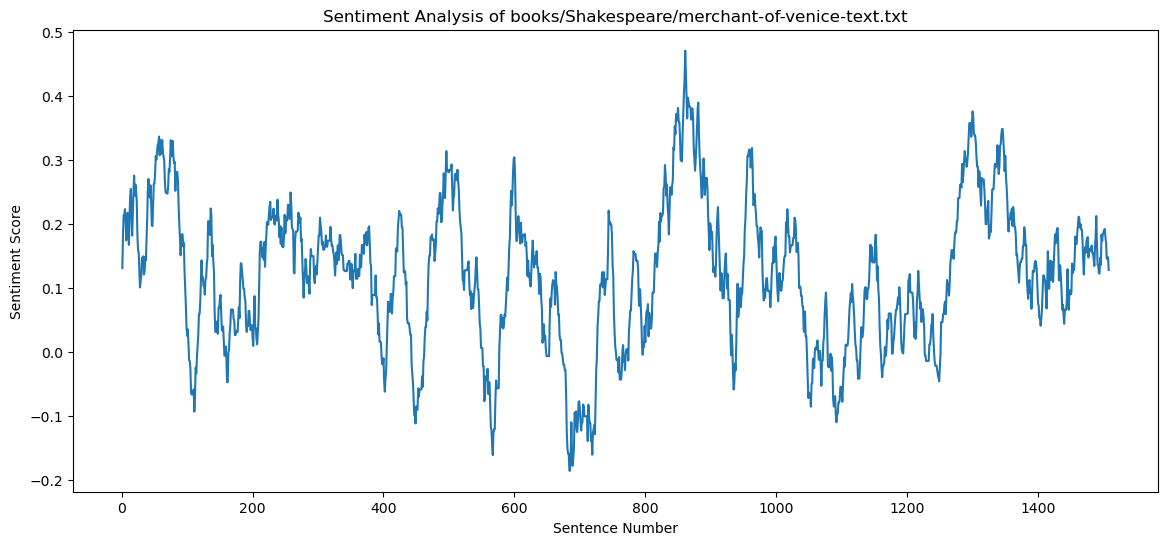

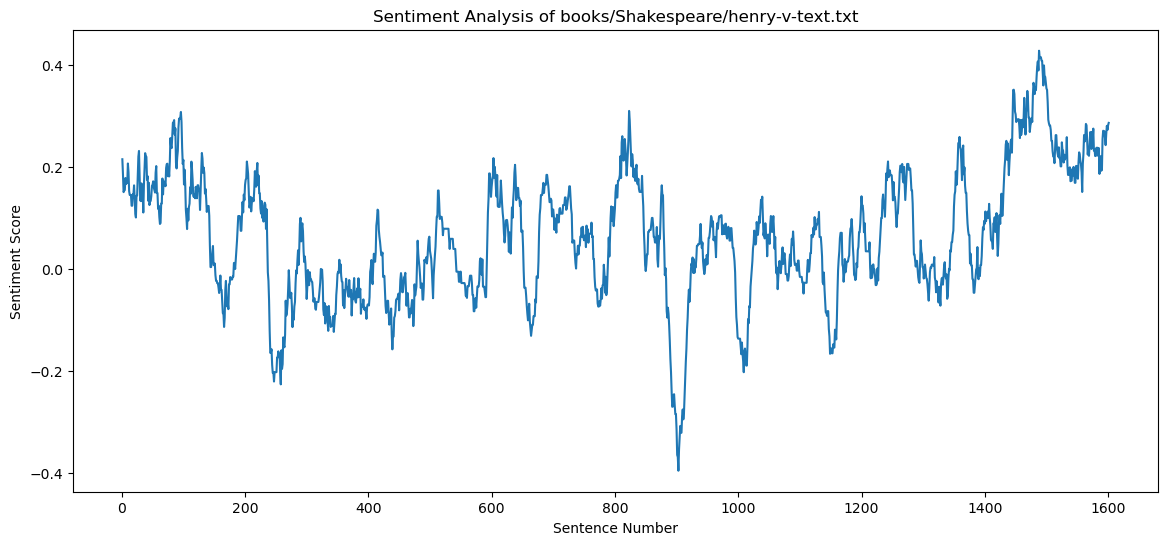

In [42]:
def analyze_sentiment (book):
    with open(book, "r") as file:
        text = file.read()

    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    sia = SentimentIntensityAnalyzer()
    sentiment_scores = []

    def get_value(sentence):
        return sia.polarity_scores(sentence)["compound"]

    for sentence in sentences:
        value = get_value(sentence)
        sentiment_scores.append(value)

    # Define the window size for the moving average - n of sentences
    window_size = 25

    # Calculate the moving average using numpy's convolve function
    moving_averages = np.convolve(sentiment_scores, np.ones(window_size)/window_size, mode='valid')

    # Update sentence_numbers to match the length of moving_averages
    sentence_numbers = list(range(1, len(moving_averages) + 1))

    plt.figure(figsize=(14,6))
    plt.plot(sentence_numbers, moving_averages)
    plt.xlabel("Sentence Number")
    plt.ylabel("Sentiment Score")
    plt.title("Sentiment Analysis of " + book)
    plt.show()

for file_path in glob.glob("books/**/*.txt", recursive=True):
    analyze_sentiment(file_path)